In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, rc={'text.usetex': True})
sns.set_style("whitegrid")

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [13]:
def plot_rewards(df):
    ax = sns.lineplot(data=df,
              x='episode',
              y='Reward_acc',
              )

    ax.set(xlabel='Episode', ylabel='Rewards accumulated')
    plt.savefig('NEW_ipd_2-player_' + scenario + '_rewards.png', dpi=400)
    plt.show()
    plt.close()

def plot_shares(df):
    ax = sns.lineplot(data=df,
              x='episode',
              y='A1_share_0',
              )

    ax.set(xlabel='Episode', ylabel='Own share')
    plt.savefig('NEW_ipd_2-player_' + scenario + '_shares.png', dpi=400)
    plt.show()
    plt.close()

def get_env_data(csv):
    experiments = [0, 1, 2, 3, 4]
    for experiment in experiments:
       
        path = 'ipd_lio_' + str(experiment) + '/log.csv'
        csv_exp = csv + path    
        data = pd.read_csv(csv_exp)

        # data['A1_share_0'] = 0.5
        data = data[['episode', 'A1_reward_total', 'A2_reward_total', 'A1_share_0']] # 
        data['Reward_acc'] = data['A1_reward_total'] + data['A2_reward_total']        
        data['experiment'] = experiment

        if experiment == 0:
            df = pd.DataFrame(data)
        elif experiment != 0:
            df = df.append(data)

    df = df.reset_index()
    return df

In [24]:
scenario = 'ipd_basic'
# scenario = 'ipd_split'
# scenario = 'ipd_choice'
# scenario = 'ipd_choice_simple'
# scenario = 'ipd_0.5'
# scenario = 'ipd_0.1'
csv = 'ipd_ac_2player/' + scenario + '/'
# csv = 'q_ipd_additional_all.csv' # 'q_ipd_0.5start_all.csv'
df = get_env_data(csv)
df

,index,episode,A1_reward_total,A2_reward_total,A1_share_0,Reward_acc,experiment
0,0,100,-1.504,-1.486,1.0,-2.990,0
1,1,200,-1.472,-1.526,1.0,-2.998,0
2,2,300,-1.412,-1.592,1.0,-3.004,0
3,3,400,-1.526,-1.424,1.0,-2.950,0
4,4,500,-1.498,-1.480,1.0,-2.978,0
...,...,...,...,...,...,...,...
995,195,19600,-1.996,-2.002,1.0,-3.998,4
996,196,19700,-2.004,-1.992,1.0,-3.996,4
997,197,19800,-2.000,-2.000,1.0,-4.000,4
998,198,19900,-2.002,-1.996,1.0,-3.998,4


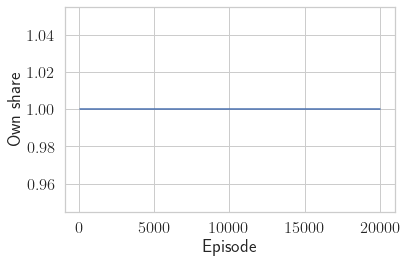

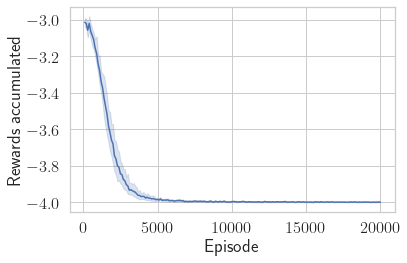

In [25]:
plot_shares(df)
plot_rewards(df)